In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# The Wiener process

The Wiener process is a stochastic process, with the following properties:
* _Starts at 0_: $W_{t=0} = 0$
* _Independent increments_: $W_s - W_t$ for $s>t$ is independent of $W_{t'} - W_{s'}$ for $t \geq s' > t'$.
* _Gaussian increments_: $W_{t+\Delta t} - W_t$ is a Gaussian random variable with zero mean and variance $\Delta t$.
* _Continuous sample paths_: $W_t$ is a continuous function of $t$, almost surely.

We can construct a discrete realisation of a Wiener process with a desired stepsize $\Delta t$ by using the above properties. If we generate independent Gaussian random numbers, with variance $\Delta t$, then they are by definition the increments of a Wiener process, which means that if we take the cumulative sum of these numbers, we get a discrete approximation of a Wiener process.

Below, we look at some examples of using non-Gaussian distributions to generate numerical approximations of the Wiener process.

## Uniformly distributed increments

For a uniform random distribution on the interval $x\in[a, b]$, the PDF is a constant, $p(x) = \frac{1}{b-a}$, and the variance is $(b-a)^2/12$. To see this, first find the mean (expectation value) of the distribution, 

$$ \mu = \int_a^b x p(x) \,\mathrm{d}x = \frac{1}{b-a} \int_a^b x\,\mathrm{d}x = \frac{1}{b-a} \left(\frac{1}{2}b^2 - \frac{1}{2}a^2\right) = \frac{b+a}{2}, $$

and then find the variance:

\begin{align}
\sigma^2 = \int_a^b (x - \mu)^2 p(x) \,\mathrm{d}x.
\end{align}

The integral is left as an exercise to the reader.


The point here is that to obtain a uniform distribution with mean $\mu=0$, we have to use a symmetric interval, $x\in[-L, L]$, which gives variance $L^2/3$, and to have variance $\sigma^2 = \Delta t$, we thus have to use the interval $x\in[-\sqrt{3\Delta t}, \sqrt{3\Delta t}]$.

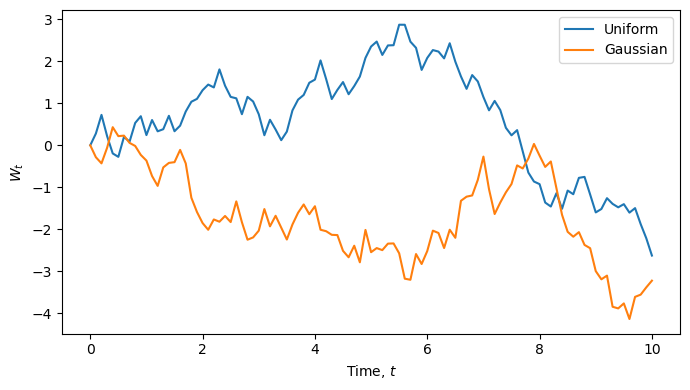

In [2]:
dt = 0.1
Tmax = 10
Nt = int(Tmax/dt)+1

# Time
t = dt*np.arange(Nt)

fig, ax = plt.subplots(figsize = (7, 4))

# Generate and plot with non-Gaussian increments
W = np.zeros(Nt)
W[1:] = np.cumsum( np.random.uniform(low = -np.sqrt(3*dt), high=np.sqrt(3*dt), size = Nt-1))
plt.plot(t, W, label='Uniform')

# Compare to Gaussian increments with same dt
W = np.zeros(Nt)
W[1:] = np.cumsum( np.random.normal(loc=0, scale=np.sqrt(dt), size = Nt-1) )
plt.plot(t, W, label='Gaussian')

plt.legend()
plt.xlabel('Time, $t$')
plt.ylabel('$W_t$')
plt.tight_layout()

### Generate a large number of realisations, and look at distribution

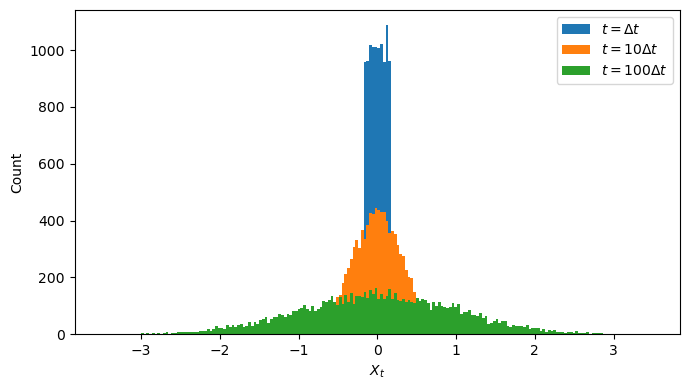

In [3]:
dt = 0.01
Tmax = 10
Nt = int(Tmax/dt)+1
Np = 10000 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Generate many realisations
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum( np.random.uniform(low = -np.sqrt(3*dt), high=np.sqrt(3*dt), size = (Nt-1, Np)), axis =0)

# Plot distributions after different times
fig = plt.figure(figsize = (7, 4))

Wmax = np.amax(np.abs(W))
bins = np.linspace(-Wmax/4, Wmax/4, 201)
plt.hist(W[1,:], bins=bins, label='$t=\Delta t$')
plt.hist(W[10,:], bins=bins, label='$t=10 \Delta t$')
plt.hist(W[100,:], bins=bins, label='$t=100 \Delta t$')

plt.legend()
plt.ylabel('Count')
plt.xlabel('$X_t$')
plt.tight_layout()

## (shifted) Weibull distributed increments

The Weibull distribution is a probability distribution where $x\in[0, \infty)$, and hence it cannot have zero mean (unless it also has variance 0). However, we can generate random numbers from the distribution, then scale them to achive the variance we want, and then shift them to achieve the mean we want. An example is shown below.

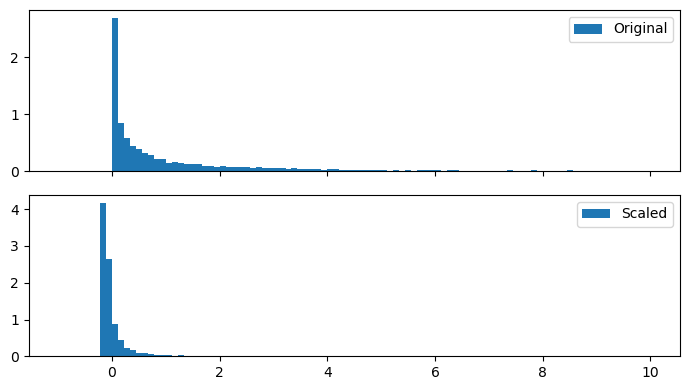

In [4]:
a = 0.5 # shape parameter
dt = 0.1 # timestep (and we want var = dt)

# Draw random numbers
r = np.random.weibull(a, 10000)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(7,4))


# Plot histogram
bins = np.linspace(-1, 10, 100)
ax[0].hist(r, bins=bins, density=True, label='Original')
ax[0].legend()

# Get variance, and scale to achieve desired variance
var = np.var(r)
r = r * np.sqrt(dt/var)
# Get mean, and shift to achieve zero mean
mu = np.mean(r)
r = r - mu

# Plot histogram of scaled and shifted distribution
ax[1].hist(r, bins=bins, density=True, label='Scaled')
ax[1].legend()

plt.tight_layout()

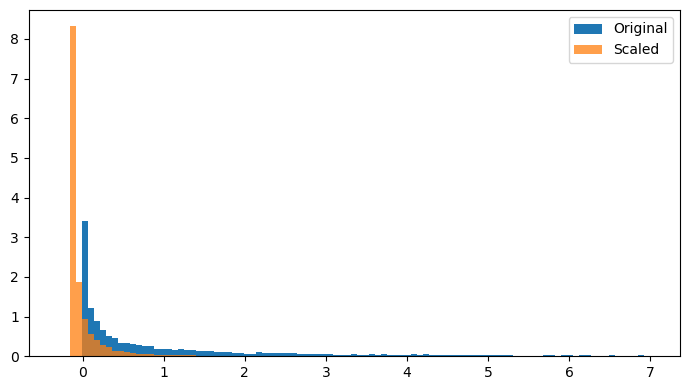

In [5]:
a = 0.5 # shape parameter
dt = 0.1 # timestep (and we want var = dt)

# Draw random numbers
r = np.random.weibull(a, 10000)

fig = plt.figure(figsize=(7,4))

# Plot histogram
bins = np.linspace(-0.3, 7, 100)
plt.hist(r, bins=bins, density=True, label='Original')

# Get variance, and scale to achieve desired variance
var = np.var(r)
r = r * np.sqrt(dt/var)
# Get mean, and shift to achieve zero mean
mu = np.mean(r)
r = r - mu

# Plot histogram of scaled and shifted distribution
plt.hist(r, bins=bins, density=True, label='Scaled', alpha=0.75)
plt.legend()

plt.tight_layout()

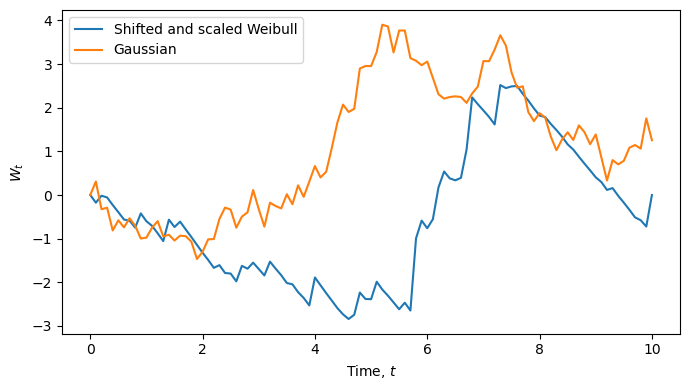

In [6]:
dt = 0.1
Tmax = 10
Nt = int(Tmax/dt)+1

# Time
t = dt*np.arange(Nt)

fig, ax = plt.subplots(figsize = (7, 4))

# Generate and scale random numbers
r = np.random.weibull(a, size = Nt-1)
var = np.var(r)
r = r*np.sqrt(dt/var)
mu = np.mean(r)
r = r - mu
# Construct approximate Wiener process
W = np.zeros(Nt)
W[1:] = np.cumsum(r)

plt.plot(t, W, label='Shifted and scaled Weibull')

# Compare to Gaussian increments with same dt
W = np.zeros(Nt)
W[1:] = np.cumsum( np.random.normal(loc=0, scale=np.sqrt(dt), size = Nt-1) )
plt.plot(t, W, label='Gaussian')

plt.legend()
plt.xlabel('Time, $t$')
plt.ylabel('$W_t$')
plt.tight_layout()

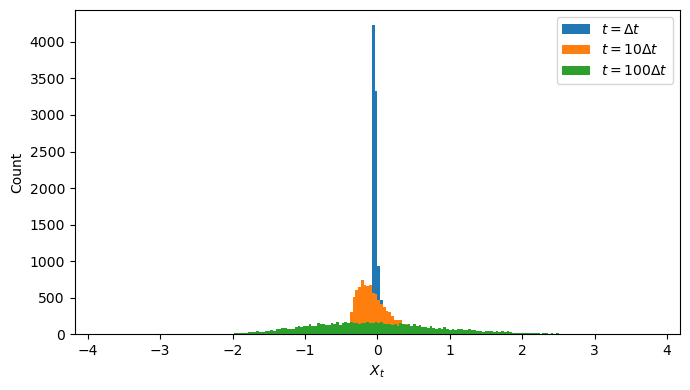

In [7]:
dt = 0.01
Tmax = 10
Nt = int(Tmax/dt)+1
Np = 10000 # Number of realisations

# Time
t = np.linspace(0, Tmax, Nt)

# Generate many realisations
# Generate and scale random numbers
r = np.random.weibull(a, size = (Nt-1, Np))
var = np.var(r)
r = r*np.sqrt(dt/var)
mu = np.mean(r)
r = r - mu
# Construct approximate Wiener process
W = np.zeros((Nt, Np))
W[1:,:] = np.cumsum(r, axis=0)

# Plot distributions after different times
fig = plt.figure(figsize = (7, 4))

Wmax = np.amax(np.abs(W))
bins = np.linspace(-Wmax/4, Wmax/4, 201)
plt.hist(W[1,:], bins=bins, label='$t=\Delta t$')
plt.hist(W[10,:], bins=bins, label='$t=10 \Delta t$')
plt.hist(W[100,:], bins=bins, label='$t=100 \Delta t$')

plt.legend()
plt.ylabel('Count')
plt.xlabel('$X_t$')
plt.tight_layout()